In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
words = open("names.txt", "r").read().split("\n")

In [3]:
START = "."

In [4]:
import string
itol = {i +1 : c for i, c in  enumerate(string.ascii_lowercase)}
itol[0] = START
ltoi = {s : l  for l, s in itol.items()}
ltoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [5]:
def make_data_set(words):    
    X = []
    Y = []
    for word in words:
        ix = [ltoi[START]] * 3
        word = list(word) + [START]
        for ch in word:
            X.append(ix)
            i = ltoi[ch]
            Y.append(i)
            ix = ix[1:] + [i]
    return torch.tensor(X), torch.tensor(Y)

import random
random.seed(13)
random.shuffle(words)
n1 = int(len(words)*0.8)
n2 = int(len(words)*0.9)
tr_words = words[:n1]
te_words = words[n1:n2]
vl_words = words[n2:]

Xtrain, Ytrain = make_data_set(tr_words)
Xtest, Ytest = make_data_set(te_words)
XValid, YValid = make_data_set(vl_words)


In [6]:
Xtrain.shape, Ytrain.shape

(torch.Size([182597, 3]), torch.Size([182597]))

In [7]:
def calculate_loss(X, Y):
    emb = C[X]
    loss = F.cross_entropy((torch.tanh(emb.view(-1, 30) @ W1 + B1)) @ W2 + B2, Y)
    return loss.item()

In [8]:
EMDIM = 10
HSIZE = 300

In [9]:
g = torch.Generator().manual_seed(2147483647)
C = torch.rand((27, EMDIM), generator=g)
W1 = torch.rand((EMDIM*3, HSIZE), generator=g)
B1 = torch.rand(HSIZE, generator=g)
W2 = torch.rand((HSIZE, 27), generator=g)
B2 = torch.rand(27, generator=g)

In [10]:
parameters = [C, W1, B1, W2, B2]

In [11]:
for p in parameters:
    p.requires_grad = True

In [12]:
lossi = []
stepi = []

In [13]:
import torch.nn.functional as F
g = torch.Generator().manual_seed(2147483647)

In [20]:
for i in range(10000):
    ix = torch.randint(0, Xtrain.shape[0], (64,))
    X = Xtrain[ix]
    Y = Ytrain[ix]
    emb = C[X]
    # forward
    loss = F.cross_entropy((torch.tanh(emb.view(-1, 30) @ W1 + B1)) @ W2 + B2, Y)
    # backward
    for p in parameters:
        p.grad = None
    loss.backward()
    lr = 0.01
    for p in parameters:
        p.data += -0.1 * p.grad
    stepi.append(len(stepi))
    lossi.append(loss.log10().item())
print(loss.item())


1.921963095664978


In [21]:
calculate_loss(Xtrain, Ytrain)

2.0480947494506836

In [22]:
calculate_loss(Xtest, Ytest)

2.1664164066314697

In [17]:
calculate_loss(XValid, YValid)

2.172267198562622

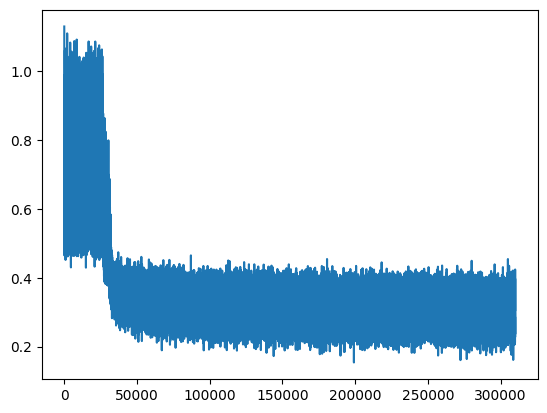

In [23]:
plt.plot(stepi, lossi)

In [24]:
g = torch.Generator().manual_seed(2147483647)
for _ in range(10):
    mm = []
    x = [0] * 3
    while True:
        emb =  C[x]
        h = ((torch.tanh(emb.view(-1, 30) @ W1 + B1)) @ W2 + B2)
        r = torch.multinomial(h.softmax(dim=1), num_samples=1, replacement=True, generator=g).item()
        x = x[1:] + [r]
        if r == 0:
            break
        mm.append(itol[r])
    print("".join(mm))

celid
moghine
rocz
tyhir
mairatta
malandro
andr
samiyah
javer
gotis
